# NNIA: Tutorial 1 - 07.11.2017

### 0. Markdown [Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

### 1. Jupyter notebook features

#### Shortcuts

Jupyter notebooks can be run in two modes: 
- Command mode 
- Edit mode

Following are some keyboard shortcuts commonly used in command mode.

Command | Action |
------------- |:------------- |
Enter | Enter into edit mode 
[Ctrl / Cmd] + Enter | Run highlighted cell 
Shift + Enter | Run highlighted cell, select cell below 
[Alt / Opt] + Enter | Run highlighted cell, insert cell below 
Y | Change cell to coding mode 
M | Change cell to markdown mode 
Up / K | Select cell above current cell 
Down / J | Select cell below current cell 
A / B | Insert cell above / below 
X | Cut selected cell 
[Ctrl / Cmd] + S | Save and checkpoint notebook 

#### $\LaTeX$ support

You can include $\LaTeX$ within your markdown cells which will be rendered by *MathJax*.

$$\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}$$

$$ \alpha, \beta, \dots, \Omega $$

$$ \Biggl(\biggl(\Bigl(\bigl((x)\bigr)\Bigr)\biggr)\Biggr) $$

$$
        \begin{bmatrix}
        1 & x & x^2 \\
        1 & y & y^2 \\
        1 & z & z^2 \\
        \end{bmatrix}
$$

For more examples check this [reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).

#### Displaying Images in Jupyter

Images can be displayed in a *notebook* using the ```![ImageCaption](ImagePath)```. The image caption is displayed if the image is not available in the path specified.

<br/>
![Jupyter Logo](./jupyter.jpg)
<br/>

### 2. Introducing numpy

In [12]:
import numpy as np

Quoting the project homepage:

>NumPy is the fundamental package for scientific computing with Python. It contains among other things:
> - **a powerful N-dimensional array object**
> - **sophisticated (broadcasting) functions**
> - tools for integrating C/C++ and Fortran code
> - useful linear algebra, Fourier transform, and random number capabilities

See [this](https://www.safaribooksonline.com/library/view/python-for-data/9781449323592/ch04.html) book chapter for a nice introduction to numpy.

#### Vectorization

Refers to arithmetic operations performed using (equally sized) arrays.

In [19]:
a = np.ones(10)
b = np.zeros(10)
s = a + b
print(s)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [20]:
tmp = np.random.normal(size=10000)
print('Sum: {:.2f}'.format(np.sum(tmp)))
print('Mean: {:.2f}'.format(np.mean(tmp)))
print('Min: {:.2f}'.format(np.min(tmp)))
print('Max: {:.2f}'.format(np.max(tmp)))

Sum: -86.53
Mean: -0.01
Min: -4.03
Max: 4.31


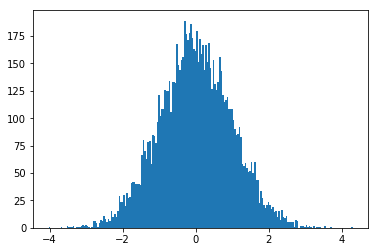

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(tmp, bins=200);

#### Broadcasting

> Broadcasting describes how numpy treats arrays with different shapes during arithmetic operations.

See [here](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html) for more detailed information.

In short, broadcasting allows us the following kind of computations:

In [16]:
a = np.array([1.0, 2.0, 3.0])
b = 3.0
c = a * b
print(c)

[ 3.  6.  9.]


> **Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python.**

#### Conclusion: Try to avoid loops when using numpy

If you let numpy take care of loops, your code will run much faster.

In [17]:
%%timeit -r 10 -n 10
a = np.arange(10000)
s = 0
for element in a:
    s += a

74.4 ms ± 3.54 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [18]:
%%timeit -r 10 -n 10
s = np.sum(a)

3.43 µs ± 1.1 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


For a more evolved discussion see [here](https://stackoverflow.com/questions/41325427/numpy-ufuncs-speed-vs-for-loop-speed).

### 3. Recap: Linear Regression

#### Simple Linear Regression Problem

All we know is that the **true** relationship between $x \in \mathbb{R}$ and $y \in \mathbb{R}$ is of the following form $ y = f(x) + \epsilon$, where $\epsilon$ is the (mean-zero) random error term.

What we do in linear regression is to assume that $f(x)$ is a **linear function**. Hence, we can write the relationship between $x$ and $y$ as 

$$ y = \beta_0 + \beta_1 * x + \epsilon$$

#### Estimating $\beta_0$ and $\beta_1$

Since the coefficients of the true relationship is unknown, the best we can do is estimate the model coefficients.

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 * x$$

**Question**: How do we estimate the coefficients?

Let $\hat{y}$ be the predicted output and $y$ be the true output. 

- Define $r_i = \hat{y}_i - y_i$ (residual)
- Define $RSS = \sum_{i=0}^n r_i^2$ (residual sum of squares)

#### Fitting the model

Task: Find paramters $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimize $RSS$.

#### Closed form solution

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 * \bar{x}$$

$$\hat{\beta}_1 = \frac{\sum_{i=0}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=0}^n (x_i - \bar{x})^2}$$

*Derivation on blackboard.*

### Normal equations for multiple linear regression

$$RSS = (y - \mathbf{X}\beta)^T(y - \mathbf{X}\beta)$$

$$ \mathbf{X} \in \mathbb{R}^{n~\times~(p + 1)} $$
$$ y \in \mathbb{R}^{n} $$
$$ \beta \in \mathbb{R}^{p+1} $$

Differeniating with respect to $\beta$ we obtain the solution

$$ \beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty$$ 